# Центральная предельная теорема на основе 
# Экспоненциального распределения
(Версия для Python 3)

[Wiki экспоненциальное распределение](https://ru.wikipedia.org/wiki/Экспоненциальное_распределение)

Математическое ожидание:
\begin{equation}
  \mathbb{E}[X] = \frac{1}{\lambda}
 \end{equation}

Дисперсия: 
\begin{equation}
  \operatorname{D} [X] = \frac{1}{\lambda^2}
\end{equation}

Среднеквадратическое отклонение:
\begin{equation}
  \sigma = \sqrt{\operatorname{D} [X] \over n} = \frac{1}{\lambda}
\end{equation}

Где n - размер выборки

Возьмем
\begin{equation}
  \mathbb\lambda = 0.1
\end{equation}

In [ ]:
# Подключим библиотеки
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm

In [425]:
lambda_exponential = 0.1
ex = lambda_exponential ** (-1)
dx = lambda_exponential ** (-2)

## Гистограмма и теоретическая плотность выборки 1000 элементов

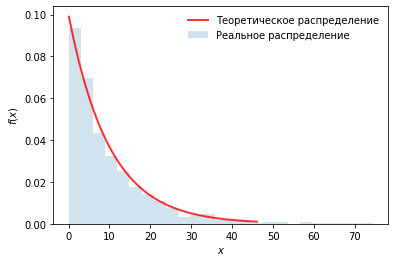

In [426]:
x = np.linspace(expon.ppf(0.01, scale=ex), expon.ppf(0.99, scale=ex), 1000)
plt.plot(x, expon.pdf(x, scale=ex), 'r', lw=2, alpha=0.8, label='Теоретическое распределение')
r = expon.rvs(scale=ex, size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, label='Реальное распределение', bins=25)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.legend(loc='best', frameon=False)
plt.show()

## Оценка распределения выборочного среднего случайной величины при разных объёмах выборок

In [427]:
# Вычисляем математическое ожидание
def ex_calc(array):
    size = len(array)
    value = 0.0
    for i in range(size):
        value += array[i]
    return value / size

# Создаем массив, каждый элемент которого мат.ожидание экспоненциальной выборки из n элементов
def calculate_average(size):
    reiteration = 1000
    
    ex_array = []
    for x in range(reiteration):
        sample = expon.rvs(scale=scale, size=size)
        
        ex_temp = ex_calc(sample)
        ex_array.append(ex_temp)
    
    return ex_array

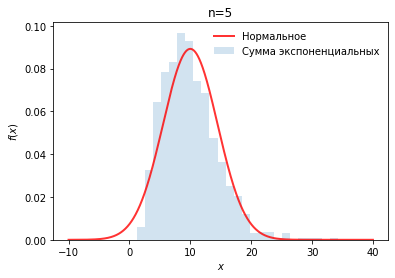

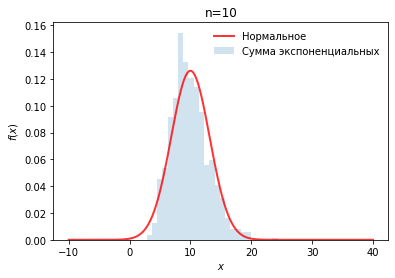

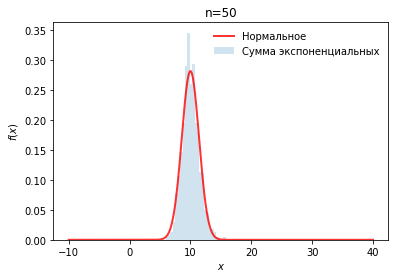

In [428]:
x_axis = np.arange(-std_exponential, std_exponential*4, 0.001)

for n in [5, 10, 50]:
    ex_array = calculate_average(n)
    
    # Среднеквадратическое отклонение
    std = np.sqrt(dx/n)
    y_norm = norm.pdf(x_axis, loc=ex, scale=std)

    plt.hist(ex_array, density=True, histtype='stepfilled', alpha=0.2, label='Сумма экспоненциальных', bins=25)
    plt.plot(x_axis, y_norm, 'r-', lw=2, alpha=0.8, label="Нормальное")
    
    plt.ylabel("$f(x)$")
    plt.xlabel("$x$")
    plt.title("n={0}".format(n))
    plt.legend(loc='best', frameon=False)
    plt.show()

# Вывод
Центральная предельная теорема работает.

Изначальное распределение совершенно не похоже на "колокол". Если объединить множество выборок экспоненциального распределения оно стремится к нормальному.